Catawba College Data Mining Class
Data 100: Chapter 7 Data Representation

INSTRUCTIONS: To open this file in Google COLAB, click on the COLAB link (blue). Follow all instructions in the Program once in Colab. You do not have to turn in the code. After studying the code and the output with your group, return to Blackboard and complete the rest of the activity.

In this notebook, we will use the power of Python code to explore several different files and create charts and graphs (visualization techniques) to gain important insight into the data.

First we need to set up our environment and import a few packages and related modules:
a. The Data 8 text uses a package called "Data Science" that provides useful functions.
b. Pandas for tabular data manipulation and analysis
c. NumPy for working with arrays
d. matplotlib for plotting
e. warnings to provide warning control
f. urllib (urlopen) to fetch urls
g. re for regular expression operations

STEP 1: Place your cursor (click) in the code cells and click on the triangle to the left of the code to execute (click RUN ANYWAY on first code block if you get an authorization error). Some code blocks WILL NOT display any output. Some code blocks generate many messages! You can clear these by clicking on the x where the messages are displayed.

In [47]:
#STEP 1:  we need to install datascience first because it is not a typical package that comes with our programming environment
#more information can be found here (optional reading https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
#!pip install datascience
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install datascience
!{sys.executable} -m pip install sodapy
#
#after this is executed you can click on the x (person changes to x when cursor is hovered) in order to clear messages

In [49]:
#STEP 1:  continued
from datascience import *
import numpy as np
import pandas as pd
from sodapy import Socrata
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

STEP 2: Running the code below will allow us read the file(s) that we will exploring. Remember to read the comments included with the code! They start with "#".

In this lab, we are going to be exploring the restaurant scores dataset found in Chapter 7. 

In [50]:
# This uses the Socrata API to download a copy of the dataset. 

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("pyih-qa8i", limit=2000)
# This restricts us to 2000 records,
# but we could change this number for a larger value

# Convert to pandas DataFrame
results = pd.DataFrame.from_records(results)

results

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,inspection_id,...,inspection_type,violation_id,violation_description,risk_category,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,business_phone_number
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,"{'type': 'Point', 'coordinates': [-122.410513,...",835_20180917,...,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk,107,107,6,3,6,NaN
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,"{'type': 'Point', 'coordinates': [-122.404033,...",905_20190415,...,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk,19,19,6,3,8,NaN
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.46659,"{'type': 'Point', 'coordinates': [-122.46659, ...",1203_20170803,...,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk,5,5,8,4,11,+14155755175
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,"{'type': 'Point', 'coordinates': [-122.420264,...",1345_20170928,...,Routine - Unscheduled,1345_20170928_103105,Improper cooling methods,High Risk,105,105,4,3,21,NaN
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,"{'type': 'Point', 'coordinates': [-122.434935,...",1352_20180620,...,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk,38,38,3,5,5,+14155863990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2017,THE GROVE FILLMORE,2016 FILLMORE St,San Francisco,CA,94115,37.788147,-122.433637,"{'type': 'Point', 'coordinates': [-122.433637,...",2017_20161024,...,Routine - Unscheduled,2017_20161024_103116,Inadequate food safety knowledge or lack of ce...,Moderate Risk,102,102,4,6,30,+14155471419
1996,35862,Toast Eatery,3991 24th St,San Francisco,CA,94114,37.751423,-122.431618,"{'type': 'Point', 'coordinates': [-122.431618,...",35862_20180125,...,Routine - Unscheduled,35862_20180125_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,84,84,3,5,22,NaN
1997,64195,Golden Gate Indian Cuisine & Pizza,1388 C 46th Ave,San Francisco,CA,94122,37.758941,-122.48591,"{'type': 'Point', 'coordinates': [-122.48591, ...",64195_20170104,...,Routine - Unscheduled,64195_20170104_103142,Unclean nonfood contact surfaces,Low Risk,39,39,10,7,35,NaN
1998,63084,New Lien Hing,400 Clement St,San Francisco,CA,94118,37.783008,-122.463562,"{'type': 'Point', 'coordinates': [-122.463562,...",63084_20170424,...,Routine - Unscheduled,63084_20170424_103103,High risk food holding temperature,High Risk,5,5,8,4,11,NaN


We will start by selecting the columns we are interested in. This dataset has a number of columns we don't need to use, such as geographic information. 

In [51]:
restaurants = results[['business_name', 'inspection_score', 'inspection_type', 'violation_description', 'risk_category']]
restaurants

,business_name,inspection_score,inspection_type,violation_description,risk_category
0,Kam Po Kitchen,88,Routine - Unscheduled,Improper food storage,Low Risk
1,Working Girls' Cafe',87,Routine - Unscheduled,High risk vermin infestation,High Risk
2,TAWAN'S THAI FOOD,77,Routine - Unscheduled,Moderate risk food holding temperature,Moderate Risk
3,Cordon Bleu,81,Routine - Unscheduled,Improper cooling methods,High Risk
4,LA TORTILLA,74,Routine - Unscheduled,Non service animal,Low Risk
...,...,...,...,...,...
1995,THE GROVE FILLMORE,92,Routine - Unscheduled,Inadequate food safety knowledge or lack of ce...,Moderate Risk
1996,Toast Eatery,78,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk
1997,Golden Gate Indian Cuisine & Pizza,86,Routine - Unscheduled,Unclean nonfood contact surfaces,Low Risk
1998,New Lien Hing,80,Routine - Unscheduled,High risk food holding temperature,High Risk


<AxesSubplot:>

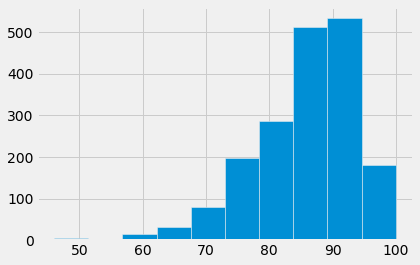

In [79]:
# We can look at the scores as a histogram, but to do that we need to 
# convert the inspection_score column to a numeric type so that we can 
# plot it. 
restaurants['inspection_score'].astype(np.float).hist()

Now, lets look more closely at the categories of risk violation and inspection types. 

In [113]:
# value_counts counts the number of unique instances of a term. 
# to_frame converts the results into a structure called a data frame
# that is easier to manipulate
restaurants['risk_category'].value_counts().to_frame()

,risk_category
Low Risk,987
Moderate Risk,685
High Risk,283


In [114]:
# We repeat the process with the inspection type.
restaurants['inspection_type'].value_counts().to_frame()

,inspection_type
Routine - Unscheduled,1849
Complaint,75
Reinspection/Followup,32
New Ownership,14
Non-inspection site visit,9
Foodborne Illness Investigation,7
New Construction,5
Structural Inspection,4
New Ownership - Followup,4
Routine - Scheduled,1


Let's make a very simple bar plot to look at the distributions.

<AxesSubplot:>

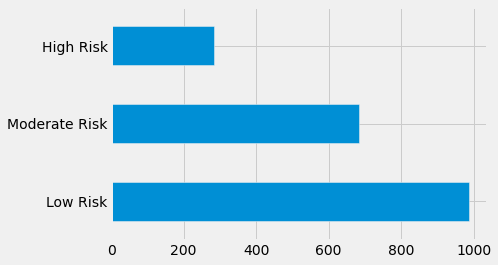

In [121]:
# This is using slightly different commands to make the chart since 
# this is a data frame. 
restaurants['risk_category'].value_counts().plot.barh()

We see that there are many low risk violations and fewer high risk violations. Lets see what kinds of violations occur most often. 

In [127]:
def risk_counts(risk):
    return (restaurants.loc[restaurants['risk_category'] == risk,
                       'violation_description']
            .value_counts().head())

In [128]:
# Now, we can look at the categories. 
# Start with the 'High Risk Group and make a data frame'
risk_counts('High Risk').to_frame()

,violation_description
High risk food holding temperature,62
Improper cooling methods,57
Unclean or unsanitary food contact surfaces,52
High risk vermin infestation,44
Unclean hands or improper use of gloves,30


<AxesSubplot:>

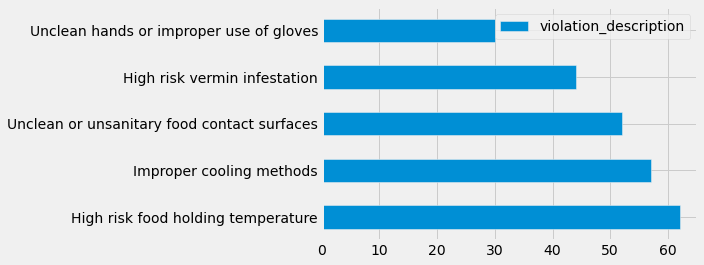

In [129]:
# Make a bar chart showing the distribution of violations.
risk_counts('High Risk').to_frame().plot.barh()

In [ ]:
#It's your turn now. 

In [ ]:
# Make a data frame for the 'Moderate Risk' group.

In [ ]:
# Then, make a data frame for the 'Low Risk' group.

In [131]:
# Lastly, make a horizontal bar chart showing the distributions of violations
# for the 'Moderate Risk' and 'Low Risk' groups. 

When you finish, download your ipynb file and upload it to blackboard.